In [1]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

**STATIONARY BANDIT**

In [2]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0

# Training params
iter_per_run = 10000
epsilon = 0.01

In [3]:
for i in range(no_bandits):
    bandits.append(ka.KarmedStationary(arms, means, sigmas, init_estim_vals))
    bandits[i].set_train_params(iter_per_run, epsilon)

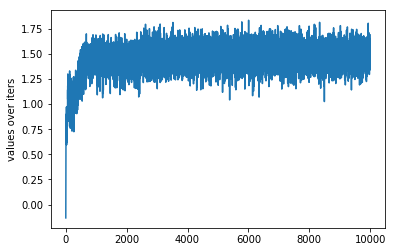

In [4]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards = bandits[b].train()
    all_agents_iter_values.append(iter_values)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

**NON-STATIONARY BANDIT**

In [17]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
alpha = 0.2
normal_noise_mu = 0
normal_noise_sigma = 0.01

# Training params
iter_per_run = 1000
epsilon = 0.01

In [22]:
for i in range(no_bandits):
    bandits.append(ka.KarmedNonStationary(arms, means, sigmas, init_estim_vals, alpha))
    bandits[i].set_train_params(iter_per_run, epsilon)
    bandits[i].setRandomNoise(normal_noise_mu, normal_noise_sigma)

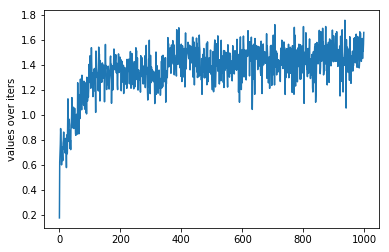

mu: -0.3719468546587249   sigma: 0.3
mu: 1.86007110005992   sigma: 0.3
mu: 0.12732290173064306   sigma: 0.3
mu: -0.3353679524695607   sigma: 0.3
mu: -0.5372015899390962   sigma: 0.3
mu: 0.8967551931029771   sigma: 0.3
mu: 0.6122438299048996   sigma: 0.3
mu: 0.05035516183303055   sigma: 0.3
mu: -0.7550925648149045   sigma: 0.3
mu: 0.8061077051459061   sigma: 0.3


In [23]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards, leverages = bandits[b].train()
    all_agents_iter_values.append(iter_values)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

for lev in leverages:
    print('mu: ' + str(lev.getMu()) + '   sigma: ' + str(lev.getSigma()))